In [15]:
import numpy as np
import pandas as pd
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [77]:
url = "https://raw.githubusercontent.com/kwagner4821/xtern_datascience/main/2020-XTern-DS.csv"
df = pd.read_csv(url)
np_df = pd.DataFrame.to_numpy(df)



SyntaxError: ignored

In [106]:
%%R
df1 <- read_csv("https://raw.githubusercontent.com/kwagner4821/xtern_datascience/main/2020-XTern-DS.csv")
ggplot(df1,aes(x=Longitude,y=Latitude)) + 
geom_point()
df1$Rating = as.numeric(df1$Rating)
df1$Votes = as.numeric(df1$Votes)

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  Restaurant = col_character(),
  Latitude = col_double(),
  Longitude = col_double(),
  Cuisines = col_character(),
  Average_Cost = col_character(),
  Minimum_Order = col_character(),
  Rating = col_character(),
  Votes = col_character(),
  Reviews = col_character(),
  Cook_Time = col_character()
)




Conclusion 1

Identifying Trending Restaurants
The scoring algorithm takes into account average rating and number of votes.
The score is produced as following:
score = quantile(rating)*.75 + quantile(votes)*.25
Because rating is slightly more important than number of votes.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



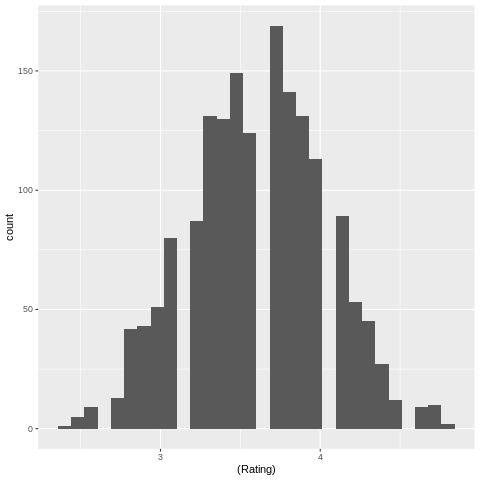

In [79]:
%%R
ggplot(df1,aes(x=(Rating))) + 
  geom_histogram()

Initial EDA of rating.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



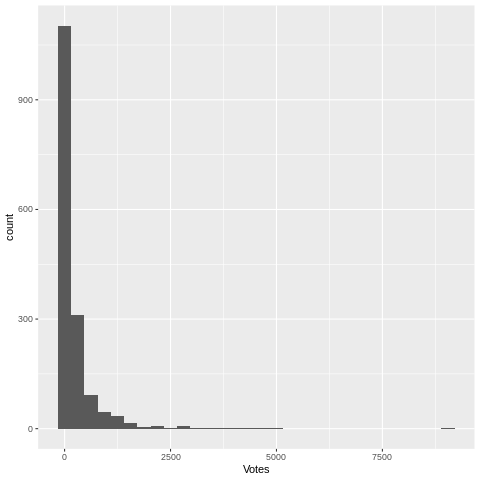

In [80]:
%%R
ggplot(df1,aes(x=Votes)) + 
  geom_histogram()

In [81]:
%%R
p1 <- ecdf(df1$Votes)
p2 <- ecdf(df1$Rating)
df1 <- mutate(
    df1,
    q_votes = p1(Votes),
    q_rating = p2(Rating)
)

Calculating Scores

In [82]:
%%R
df1 <- mutate(
    df1,
    scoring_metric = q_votes + q_rating
)

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



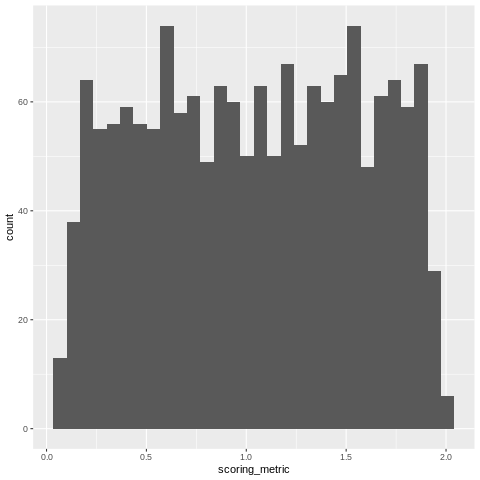

In [83]:
%%R
ggplot(df1,aes(x=scoring_metric)) + 
  geom_histogram()

In [84]:
%%R
df1 %>%
  select(Restaurant,scoring_metric,Rating,Votes) %>%
  arrange(desc(scoring_metric)) %>%
  head(10)

# A tibble: 10 x 4
   Restaurant scoring_metric Rating Votes
   <chr>               <dbl>  <dbl> <dbl>
 1 ID_1064              2.00    4.7  9054
 2 ID_2051              1.99    4.7  3975
 3 ID_1666              1.99    4.6  4903
 4 ID_6915              1.98    4.6  2858
 5 ID_2421              1.98    4.5  2831
 6 ID_7158              1.98    4.5  2805
 7 ID_2041              1.97    4.4  3248
 8 ID_7678              1.97    4.6  1507
 9 ID_7739              1.96    4.6  1502
10 ID_2885              1.96    4.3  4691


Displayed the table of the restaurant with the highest overall score and includes rating and number of votes.

Conclusion 2

Utilizing 

NameError: ignored

Conclusion 3
Estimating cooking time based on restaurant info.
We try to see the relationship between time and average cost, and whether we can predict using cost.

In [114]:
%%R
df1$Average_Cost = gsub("$","",df1$Average_Cost)
my.fun = function(x){
    y = gsub("$","",x)
    return(y)
}
apply(df1$Average_Cost,1,my.fun)
df1$Cook_time = as.numeric(df1$Cook_Time)

R[write to console]: Error in apply(df1$Average_Cost, 1, my.fun) : 
  dim(X) must have a positive length
Calls: <Anonymous> -> <Anonymous> -> withVisible -> apply

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In withVisible({ :
R[write to console]:  NAs introduced by coercion




Error in apply(df1$Average_Cost, 1, my.fun) : 
  dim(X) must have a positive length
Calls: <Anonymous> -> <Anonymous> -> withVisible -> apply


In [113]:
%%R
df1$Average_Cost
#ggplot(df1,aes(x=Cook_time,y=num_cost)) + 
#  geom_point()

   [1] "$20.00"  "$10.00"  "$15.00"  "$25.00"  "$20.00"  "$15.00"  "$15.00" 
   [8] "$65.00"  "$10.00"  "$20.00"  "$35.00"  "$80.00"  "$15.00"  "$5.00"  
  [15] "$10.00"  "$10.00"  "$10.00"  "$20.00"  "$15.00"  "$10.00"  "$20.00" 
  [22] "$15.00"  "$25.00"  "$20.00"  "$15.00"  "$10.00"  "$10.00"  "$15.00" 
  [29] "$15.00"  "$20.00"  "$15.00"  "$40.00"  "$20.00"  "$35.00"  "$10.00" 
  [36] "$60.00"  "$10.00"  "$10.00"  "$20.00"  "$30.00"  "$20.00"  "$15.00" 
  [43] "$15.00"  "$10.00"  "$20.00"  "$20.00"  "$20.00"  "$20.00"  "$20.00" 
  [50] "$20.00"  "$15.00"  "$15.00"  "$10.00"  "$20.00"  "$25.00"  "$10.00" 
  [57] "$15.00"  "$25.00"  "$10.00"  "$10.00"  "$35.00"  "$10.00"  "$60.00" 
  [64] "$20.00"  "$20.00"  "$15.00"  "$10.00"  "$20.00"  "$15.00"  "$30.00" 
  [71] "$30.00"  "$15.00"  "$20.00"  "$10.00"  "$35.00"  "$10.00"  "$10.00" 
  [78] "$10.00"  "$10.00"  "$10.00"  "$75.00"  "$10.00"  "$15.00"  "$20.00" 
  [85] "$15.00"  "$20.00"  "$15.00"  "$20.00"  "$10.00"  "$5.00"   "$15.00" 

Conclusion 4